In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt



In [2]:
# Carregando o arquivo CSV
df = pd.read_csv('dados.csv')

df.head()


,Qtd_Moradores,Maquina_de_Lavar_1,Geladeiras_1,Freezer_1,Microcomputador,Lava_Loucas_1,Microondas_1,Ar_Condicionado,Televisao,Batedeira,...,Secadora_Centrifuga,Aquecedor_de_Ambiente,Ventilador_de_Teto,Circulador_de_Ar,Videogame,Som_Radio,Filtro_de_Agua,Adega,CLASSE,Chuveiros_Eletricos
0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,1.0
1,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6,1.0
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3,1.0
4,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4,1.0


In [3]:
# Criar um dicionário de mapeamento
classe_map = {1: 'A', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2', 6: 'DE'}

# Substituir os valores da coluna 'CLASSE'
df['CLASSE'] = df['CLASSE'].map(classe_map)

# Verificar a alteração
print(df['CLASSE'].unique())

['C1' 'C2' 'DE' 'B2' 'B1' 'A']


In [4]:
df.head()

,Qtd_Moradores,Maquina_de_Lavar_1,Geladeiras_1,Freezer_1,Microcomputador,Lava_Loucas_1,Microondas_1,Ar_Condicionado,Televisao,Batedeira,...,Secadora_Centrifuga,Aquecedor_de_Ambiente,Ventilador_de_Teto,Circulador_de_Ar,Videogame,Som_Radio,Filtro_de_Agua,Adega,CLASSE,Chuveiros_Eletricos
0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,C1,1.0
1,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,C2,1.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,DE,1.0
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,B2,1.0
4,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,C1,1.0


In [5]:
# Padronizando os dados
scaler = StandardScaler()
classe = df['CLASSE']
df_sem_classe = df.drop(columns='CLASSE')
df_scaled = scaler.fit_transform(df_sem_classe)

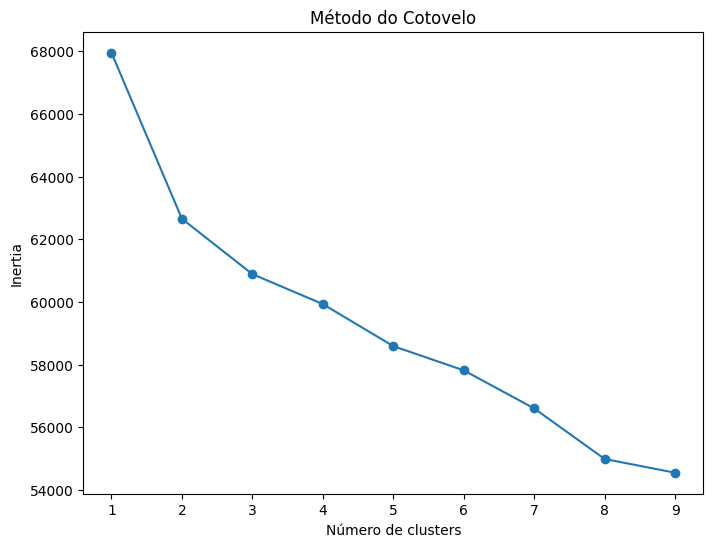

In [6]:
#Método do Cotovelo

inertia = []
K_range = range(1, 10)

# Testando diferentes números de clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico de elbow
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()


In [22]:
# Definindo o número de clusters (por exemplo, 3)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustando o modelo aos dados
kmeans.fit(df_scaled)

# Obtendo os rótulos de cluster para cada ponto
labels = kmeans.labels_

In [23]:
#Criando um dataframe com o resultado de k-means
df_kmeans = df.copy()

# Adicionando os rótulos de cluster ao dataframe original
df_kmeans['Cluster'] = labels

df_kmeans.head()

,Qtd_Moradores,Maquina_de_Lavar_1,Geladeiras_1,Freezer_1,Microcomputador,Lava_Loucas_1,Microondas_1,Ar_Condicionado,Televisao,Batedeira,...,Aquecedor_de_Ambiente,Ventilador_de_Teto,Circulador_de_Ar,Videogame,Som_Radio,Filtro_de_Agua,Adega,CLASSE,Chuveiros_Eletricos,Cluster
0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,C1,1.0,0
1,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,C2,1.0,0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,DE,1.0,0
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,B2,1.0,0
4,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,C1,1.0,0


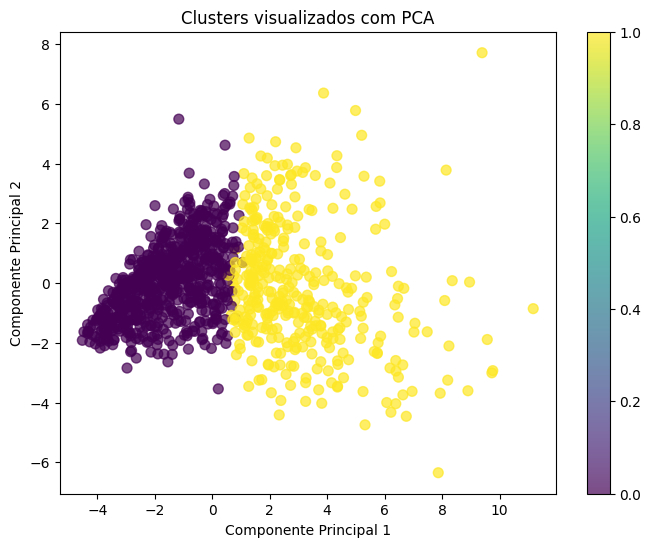

In [24]:
# Reduzindo os dados para 2 componentes principais
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plotando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

In [25]:
# Contando as classes em cada cluster
class_count = df_kmeans.groupby(['Cluster', 'CLASSE']).size().unstack(fill_value=0)

# Exibindo o resultado
print(class_count)


CLASSE    A  B1   B2   C1   C2   DE
Cluster                            
0         3  26  116  167  239  175
1        37  49  134  126   23    1


Clusterizando as classes

In [26]:
# Calculando a média das variáveis agrupadas por 'CLASSE'
df_media_classes = df.groupby('CLASSE').mean()

# Exibindo o resultado
print(df_media_classes.shape)  # Deve mostrar (6, 62)
print(df_media_classes.head())

(6, 62)
        Qtd_Moradores  Maquina_de_Lavar_1  Geladeiras_1  Freezer_1  \
CLASSE                                                               
A            3.725000            1.175000      1.325000   1.425000   
B1           3.306667            1.053333      1.120000   1.266667   
B2           2.944000            0.992000      1.064000   1.120000   
C1           2.849829            0.948805      1.044369   1.037543   
C2           2.633588            0.843511      1.007634   0.770992   

        Microcomputador  Lava_Loucas_1  Microondas_1  Ar_Condicionado  \
CLASSE                                                                  
A              1.825000       0.525000      1.075000         1.650000   
B1             1.453333       0.373333      0.973333         1.186667   
B2             1.020000       0.128000      0.932000         0.848000   
C1             0.668942       0.040956      0.784983         0.614334   
C2             0.148855       0.000000      0.522901         0.

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Padronizando os dados (opcional, mas recomendado)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_media_classes)

# Aplicando o K-means nas médias das classes
k = 3  # Você pode ajustar o número de clusters conforme necessário
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Adicionando os rótulos de cluster ao DataFrame de médias
df_media_classes['Cluster'] = clusters

# Exibindo o resultado
print(df_media_classes)


        Qtd_Moradores  Maquina_de_Lavar_1  Geladeiras_1  Freezer_1  \
CLASSE                                                               
A            3.725000            1.175000      1.325000   1.425000   
B1           3.306667            1.053333      1.120000   1.266667   
B2           2.944000            0.992000      1.064000   1.120000   
C1           2.849829            0.948805      1.044369   1.037543   
C2           2.633588            0.843511      1.007634   0.770992   
DE           2.284091            0.431818      1.005682   0.363636   

        Microcomputador  Lava_Loucas_1  Microondas_1  Ar_Condicionado  \
CLASSE                                                                  
A              1.825000       0.525000      1.075000         1.650000   
B1             1.453333       0.373333      0.973333         1.186667   
B2             1.020000       0.128000      0.932000         0.848000   
C1             0.668942       0.040956      0.784983         0.614334   
C

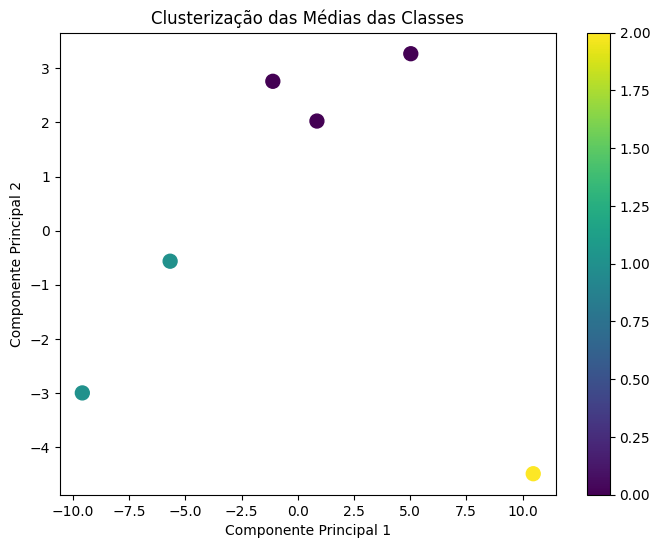

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicando PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Plotando os clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=100)
plt.title('Clusterização das Médias das Classes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()


In [29]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

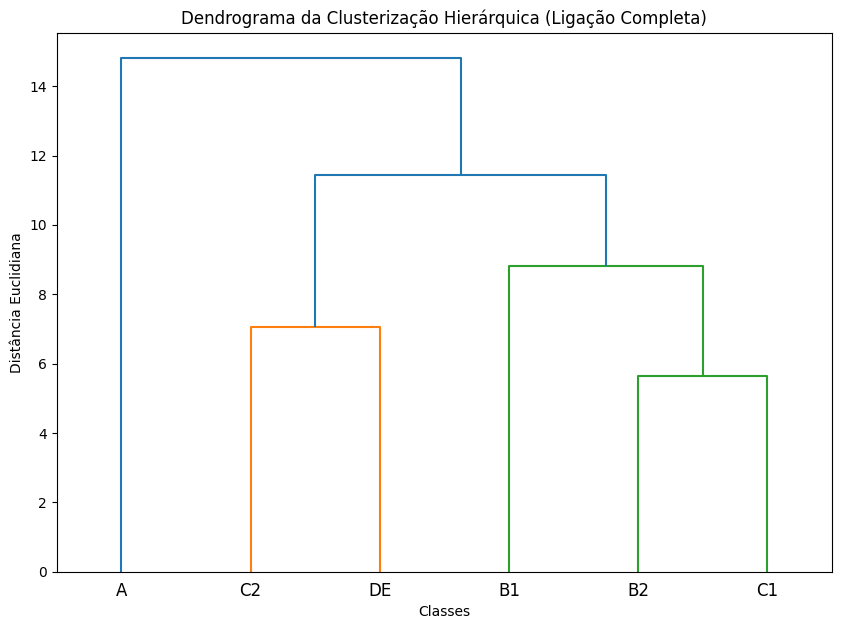

In [43]:
# Aplicar o linkage (método de ligação completa)
Z = sch.linkage(df_scaled, method='average')

# Plotar o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma da Clusterização Hierárquica (Ligação Completa)")
sch.dendrogram(Z, labels=df_media_classes.index)
plt.xlabel('Classes')
plt.ylabel('Distância Euclidiana')
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster

# Extrair clusters a partir do linkage com base na distância
n_clusters = 3  # Definir o número de clusters que deseja
clusters_hierarchical = fcluster(Z, n_clusters, criterion='maxclust')

# Adicionar os clusters ao DataFrame de médias das classes
df_media_classes['Cluster_Hierarchical'] = clusters_hierarchical

# Exibir o DataFrame com os clusters hierárquicos
print(df_media_classes)


        Qtd_Moradores  Maquina_de_Lavar_1  Geladeiras_1  Freezer_1  \
CLASSE                                                               
A            3.725000            1.175000      1.325000   1.425000   
B1           3.306667            1.053333      1.120000   1.266667   
B2           2.944000            0.992000      1.064000   1.120000   
C1           2.849829            0.948805      1.044369   1.037543   
C2           2.633588            0.843511      1.007634   0.770992   
DE           2.284091            0.431818      1.005682   0.363636   

        Microcomputador  Lava_Loucas_1  Microondas_1  Ar_Condicionado  \
CLASSE                                                                  
A              1.825000       0.525000      1.075000         1.650000   
B1             1.453333       0.373333      0.973333         1.186667   
B2             1.020000       0.128000      0.932000         0.848000   
C1             0.668942       0.040956      0.784983         0.614334   
C

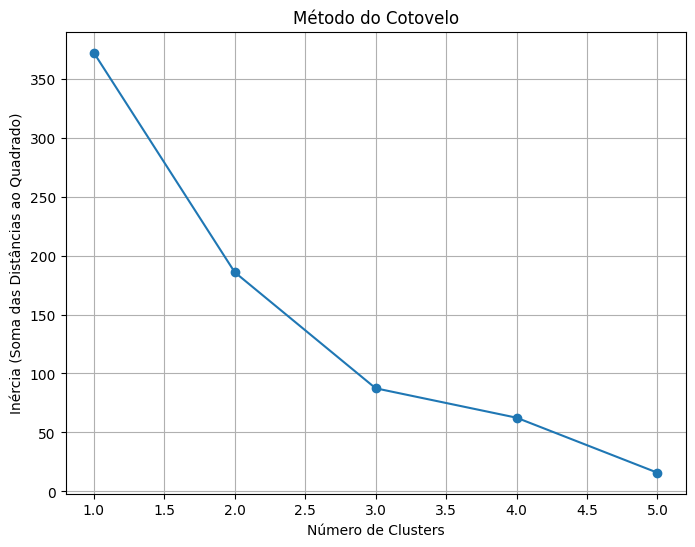

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Padronizar os dados (se ainda não estiver padronizado)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_media_classes.drop(columns=['Cluster', 'Cluster_Hierarchical'], errors='ignore'))

# Lista para armazenar a inércia (soma das distâncias ao quadrado)
inertia = []

# Testando diferentes números de clusters
for k in range(1, 6):  # Você pode ajustar o intervalo de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(inertia)+1), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia (Soma das Distâncias ao Quadrado)')
plt.grid(True)
plt.show()
